In [1]:
# Import the dependencies 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

#Import the requests library 
import requests 

#Import the API key 
from config import weather_api_key 

# Import the datetime module from the datatime library 
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e43cf2ff3dd723d916a3acbdadfe7598


In [3]:
# Create a set of random latitudes and longitudes combinations
lats = np.random.uniform(low = -90.00, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list 
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters 
record_count = 1
set_count = 1 

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bambous virieux
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | nejdek
Processing Record 4 of Set 1 | podzvizd
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | cedar city
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | freeport
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | waipawa
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | cajazeiras
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | mackay
Processing Re

Processing Record 36 of Set 4 | westport
Processing Record 37 of Set 4 | bondo
Processing Record 38 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 39 of Set 4 | masvingo
Processing Record 40 of Set 4 | saint-philippe
Processing Record 41 of Set 4 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 42 of Set 4 | pachino
Processing Record 43 of Set 4 | nizhniy tsasuchey
Processing Record 44 of Set 4 | wagar
Processing Record 45 of Set 4 | wasco
Processing Record 46 of Set 4 | los llanos de aridane
Processing Record 47 of Set 4 | podor
Processing Record 48 of Set 4 | guider
Processing Record 49 of Set 4 | kushmurun
Processing Record 50 of Set 4 | pevek
Processing Record 1 of Set 5 | keskin
Processing Record 2 of Set 5 | chegutu
Processing Record 3 of Set 5 | vao
Processing Record 4 of Set 5 | sinnamary
Processing Record 5 of Set 5 | nelson bay
Processing Record 6 of Set 5 | tura
Processing Record 7 of Set 5 | sataua
City not found. Skipping...
Process

City not found. Skipping...
Processing Record 24 of Set 8 | mercedes
Processing Record 25 of Set 8 | bontang
Processing Record 26 of Set 8 | husavik
Processing Record 27 of Set 8 | vardo
Processing Record 28 of Set 8 | inhambane
Processing Record 29 of Set 8 | pankovka
Processing Record 30 of Set 8 | aberystwyth
Processing Record 31 of Set 8 | henties bay
Processing Record 32 of Set 8 | caravelas
Processing Record 33 of Set 8 | oistins
Processing Record 34 of Set 8 | lumby
Processing Record 35 of Set 8 | tuatapere
Processing Record 36 of Set 8 | kayanga
Processing Record 37 of Set 8 | raton
Processing Record 38 of Set 8 | kulhudhuffushi
Processing Record 39 of Set 8 | samarinda
Processing Record 40 of Set 8 | banikoara
Processing Record 41 of Set 8 | shenjiamen
Processing Record 42 of Set 8 | lowestoft
Processing Record 43 of Set 8 | saldanha
Processing Record 44 of Set 8 | khovu-aksy
Processing Record 45 of Set 8 | arraial do cabo
Processing Record 46 of Set 8 | dzhusaly
City not foun

Processing Record 8 of Set 12 | karaul
City not found. Skipping...
Processing Record 9 of Set 12 | sao joao da barra
Processing Record 10 of Set 12 | linkoping
Processing Record 11 of Set 12 | narrabri
Processing Record 12 of Set 12 | keti bandar
Processing Record 13 of Set 12 | winburg
Processing Record 14 of Set 12 | haapu
City not found. Skipping...
Processing Record 15 of Set 12 | port shepstone
Processing Record 16 of Set 12 | tartus
Processing Record 17 of Set 12 | eirunepe
Processing Record 18 of Set 12 | pimentel
Processing Record 19 of Set 12 | bajos de haina
Processing Record 20 of Set 12 | bom jesus do itabapoana
Processing Record 21 of Set 12 | tilichiki
Processing Record 22 of Set 12 | sioux lookout
Processing Record 23 of Set 12 | rio grande
Processing Record 24 of Set 12 | leshukonskoye
Processing Record 25 of Set 12 | ilo
Processing Record 26 of Set 12 | mitchell
Processing Record 27 of Set 12 | kamaishi
Processing Record 28 of Set 12 | maningrida
Processing Record 29 o

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.34,57.76,75.99,60,75,6.93,MU,2020-11-02 04:48:28
1,Busselton,-33.65,115.33,64.99,60,97,3.96,AU,2020-11-02 04:48:28
2,Nejdek,50.32,12.73,55.40,93,90,5.82,CZ,2020-11-02 04:48:28
3,Podzvizd,45.17,15.87,44.01,96,5,2.17,BA,2020-11-02 04:48:29
4,Punta Arenas,-53.15,-70.92,50.00,76,0,8.05,CL,2020-11-02 04:48:29
5,Yellowknife,62.46,-114.35,10.99,84,75,9.17,CA,2020-11-02 04:48:29
6,Ancud,-41.87,-73.82,46.99,93,50,4.70,CL,2020-11-02 04:48:29
7,Cedar City,37.68,-113.06,48.20,23,1,3.36,US,2020-11-02 04:43:35
8,Albany,42.60,-73.97,39.99,72,74,1.99,US,2020-11-02 04:48:29
9,Freeport,40.66,-73.58,46.99,65,90,18.34,US,2020-11-02 04:43:48


In [9]:
#Rearrange the column 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bambous Virieux,MU,2020-11-02 04:48:28,-20.34,57.76,75.99,60,75,6.93
1,Busselton,AU,2020-11-02 04:48:28,-33.65,115.33,64.99,60,97,3.96
2,Nejdek,CZ,2020-11-02 04:48:28,50.32,12.73,55.40,93,90,5.82
3,Podzvizd,BA,2020-11-02 04:48:29,45.17,15.87,44.01,96,5,2.17
4,Punta Arenas,CL,2020-11-02 04:48:29,-53.15,-70.92,50.00,76,0,8.05
5,Yellowknife,CA,2020-11-02 04:48:29,62.46,-114.35,10.99,84,75,9.17
6,Ancud,CL,2020-11-02 04:48:29,-41.87,-73.82,46.99,93,50,4.70
7,Cedar City,US,2020-11-02 04:43:35,37.68,-113.06,48.20,23,1,3.36
8,Albany,US,2020-11-02 04:48:29,42.60,-73.97,39.99,72,74,1.99
9,Freeport,US,2020-11-02 04:43:48,40.66,-73.58,46.99,65,90,18.34


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
import time 

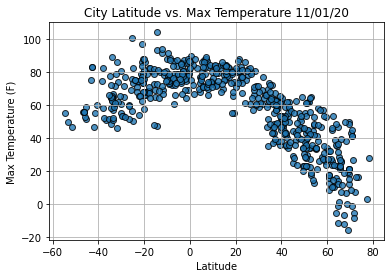

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

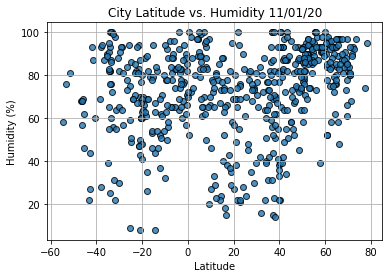

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

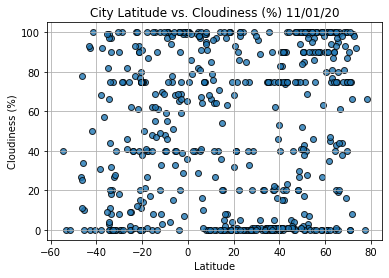

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

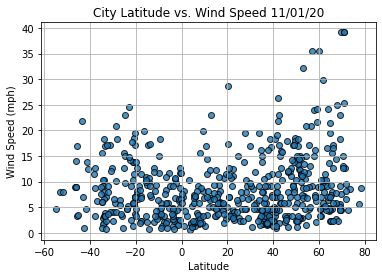

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()